<a href="https://colab.research.google.com/github/Um333r/Forecasting-CocaCola_Sales_Rawdata/blob/master/Forecasting_CocaCola_Sales_Rawdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Forecasting Assignment**

**Data Set -** CocaCola_Sales_Rawdata

1. Import Necessary libraries

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

2. Import Data


In [3]:
sales_data = pd.read_excel('/content/CocaCola_Sales_Rawdata (1).xlsx')
sales_data

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


3. Data Understanding

3.1 Initial Analysis :

In [4]:
sales_data.head()


,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [5]:
sales_data.shape


(42, 2)

In [6]:
sales_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [7]:
sales_data.isna().sum()


Quarter    0
Sales      0
dtype: int64

In [8]:
sales_data.describe()


,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [9]:
sales_data.dtypes


Quarter     object
Sales      float64
dtype: object

In [10]:
sales_data.columns


Index(['Quarter', 'Sales'], dtype='object')

In [11]:
temp = sales_data.Quarter.str.replace(r'(Q\d)_(\d+)', r'19\2-\1')
sales_data['quater'] = pd.to_datetime(temp).dt.strftime('%b-%Y')
sales_data.head()

,Quarter,Sales,quater
0,Q1_86,1734.827000,Jan-1986
1,Q2_86,2244.960999,Apr-1986
2,Q3_86,2533.804993,Jul-1986
3,Q4_86,2154.962997,Oct-1986
4,Q1_87,1547.818996,Jan-1987


In [12]:
sales_data = sales_data.drop(['Quarter'], axis = 1)
sales_data.reset_index(inplace=True)
sales_data['quater'] = pd.to_datetime(sales_data['quater'])
sales_data = sales_data.set_index('quater')
sales_data.head()

,index,Sales
quater,,
1986-01-01,0,1734.827000
1986-04-01,1,2244.960999
1986-07-01,2,2533.804993
1986-10-01,3,2154.962997
1987-01-01,4,1547.818996


3.2 Visualization using Lineplot for Sales :

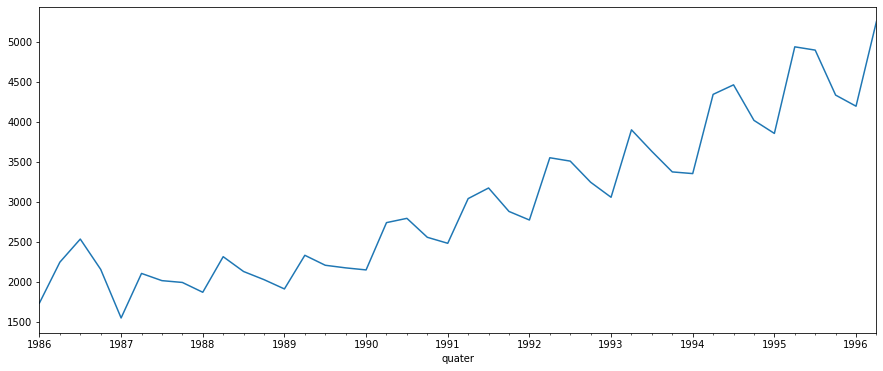

In [13]:
sales_data['Sales'].plot(figsize = (15, 6))
plt.show()

3.3 Moving Average Method :


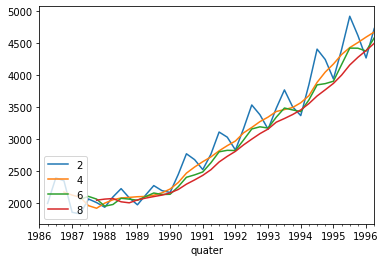

In [14]:
for i in range(2,10,2):
    sales_data["Sales"].rolling(i).mean().plot(label = str(i))
plt.legend(loc = 3)
plt.show()

3.4 Time series decomposition plot :


In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose


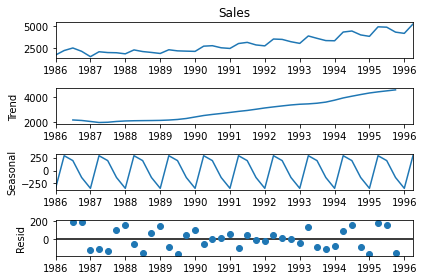

In [16]:
ts_add = seasonal_decompose(sales_data.Sales,model = "additive")
fig = ts_add.plot()
plt.show()

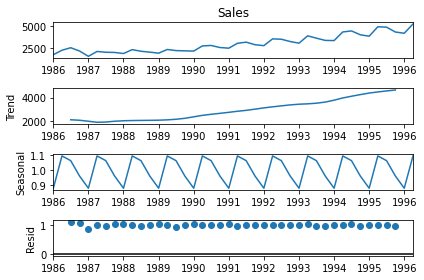

In [17]:
ts_mul = seasonal_decompose(sales_data.Sales,model = "multiplicative")
fig = ts_mul.plot()
plt.show()

3.5 Visualization using TSA Plot :


In [18]:
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models

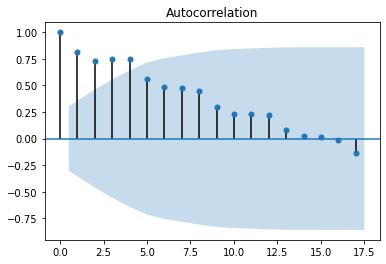

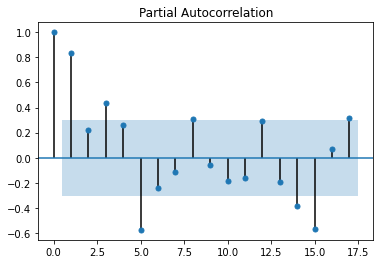

In [19]:
tsa_plots.plot_acf(sales_data.Sales)

tsa_plots.plot_pacf(sales_data.Sales)

plt.show()

4. Evaluation Metric RMSE


In [20]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing 
from statsmodels.tsa.holtwinters import Holt 
from statsmodels.tsa.holtwinters import ExponentialSmoothing

import warnings
warnings.filterwarnings('ignore')

4.1 Splitting Data :


In [21]:
def RMSE(org, pred):
    rmse = np.sqrt(np.mean((np.array(org)-np.array(pred))**2))
    return rmse

In [22]:
Train = sales_data.head(30)
Test = sales_data.tail(12)

4.2 Simple Exponential Method :


In [24]:
simple_model = SimpleExpSmoothing(Train["Sales"]).fit()
pred_simple_model = simple_model.predict(start = Test.index[0],end = Test.index[-1])


In [25]:
rmse_simple_model = RMSE(Test.Sales, pred_simple_model)
print('RMSE Value of Simple Exponential :',rmse_simple_model)


RMSE Value of Simple Exponential : 862.9139516522648


In [64]:
rmse_simple_model=862.9139

4.3 Holt method :


In [26]:
holt_model = Holt(Train["Sales"]).fit()
pred_holt_model = holt_model.predict(start = Test.index[0],end = Test.index[-1])


In [27]:
rmse_holt_model = RMSE(Test.Sales, pred_holt_model)
print('RMSE Value of Holt :',rmse_holt_model)


RMSE Value of Holt : 518.1409301044574


In [65]:
rmse_holt_model=518.1409

4.4 Holts winter exponential smoothing with additive seasonality and additive trend :

In [28]:
holt_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal = "add",trend = "add",seasonal_periods = 4).fit()
pred_holt_add_add = holt_model_add_add.predict(start = Test.index[0],end = Test.index[-1])


In [29]:
rmse_holt_add_add_model = RMSE(Test.Sales, pred_holt_add_add)
print('RMSE Value of Holts add and add :',rmse_holt_add_add_model)


RMSE Value of Holts add and add : 244.64575367464985


In [66]:
rmse_holt_add_add_model=244.6457

4.5 Holts winter exponential smoothing with multiplicative seasonality and additive trend


In [30]:
holt_model_multi_add = ExponentialSmoothing(Train["Sales"],seasonal = "mul",trend = "add",seasonal_periods = 4).fit() 
pred_holt_multi_add = holt_model_multi_add.predict(start = Test.index[0],end = Test.index[-1])


In [31]:
rmse_holt_model_multi_add_model = RMSE(Test.Sales, pred_holt_multi_add)
print('RMSE Value of Holts Multi and add :',rmse_holt_model_multi_add_model)


RMSE Value of Holts Multi and add : 202.50676572195334


In [67]:
rmse_holt_model_multi_add_model = 202.5067

5. Model based Forecasting Methods
5.1 Data preprocessing for models :

In [73]:
sales_data_1 = pd.read_excel('/content/CocaCola_Sales_Rawdata (1).xlsx')
sales_data_1.head()


,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [74]:
sales_data_2 = pd.get_dummies(sales_data_1, columns = ['Quarter'])
sales_data_2.columns = ['Sales','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1',
                        'Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2',
                        'Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3',
                        'Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4']
sales_data_2.head()


,Sales,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,...,Q4,Q4,Q4,Q4,Q4,Q4,Q4,Q4,Q4,Q4
0,1734.827000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2244.960999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2533.804993,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2154.962997,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1547.818996,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
t = np.arange(1,43)
sales_data_2['t'] = t
sales_data_2['t_squared'] = sales_data_2['t']*sales_data_2['t']
log_Sales = np.log(sales_data_2['Sales'])


In [76]:
sales_data_2['log_Sales'] = log_Sales
sales_data_2.head()


,Sales,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,...,Q4,Q4,Q4,Q4,Q4,Q4,Q4,t,t_squared,log_Sales
0,1734.827000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,7.458663
1,2244.960999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,4,7.716443
2,2533.804993,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,9,7.837477
3,2154.962997,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,16,7.675529
4,1547.818996,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,25,7.344602


5.2 Splitting Data :


In [77]:
train, test = np.split(sales_data_2, [int(.67 *len(sales_data_2))])


5.3 Linear Model :


In [78]:
import statsmodels.formula.api as smf 


In [79]:
linear_model = smf.ols('Sales~t',data = train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(test['t'])))


In [80]:
rmse_linear_model = RMSE(test['Sales'], pred_linear)
print('RMSE Value of Linear :',rmse_linear_model)


RMSE Value of Linear : 750.4020694454618


In [81]:
rmse_linear_model=750.4020

5.4 Exponential Model :


In [82]:
Exp_model = smf.ols('log_Sales~t',data = train).fit()
pred_Exp = pd.Series(Exp_model.predict(pd.DataFrame(test['t'])))


In [83]:
rmse_Exp_model = RMSE(test['Sales'], np.exp(pred_Exp))
print('RMSE Value of Exponential :',rmse_Exp_model)


RMSE Value of Exponential : 588.1405104900199


In [84]:
rmse_Exp_model=588.1405

5.5 Quadratic Model


In [85]:
Quad_model= smf.ols('Sales~t+t_squared',data = train).fit()
pred_Quad = pd.Series(Quad_model.predict(test[["t","t_squared"]]))


In [86]:
rmse_Quad_model = RMSE(test['Sales'], pred_Quad)
print('RMSE Value of Quadratic :',rmse_Quad_model)


RMSE Value of Quadratic : 783.7297975037552


In [87]:
rmse_Quad_model = 783.7297

5.6 Additive Model :


In [88]:
additive_model =  smf.ols('Sales~ Q1+Q2+Q3+Q4',data = train).fit()
pred_additive = pd.Series(additive_model.predict(pd.DataFrame(test[['Q1','Q2','Q3','Q4']])))


In [90]:
rmse_additive_model = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_additive))**2))
print('RMSE Value of Additive :',rmse_additive_model)


RMSE Value of Additive : 1869.7188209186959


In [91]:
rmse_additive_model = 1869.7188

5.7 Additive Linear Model :


In [47]:
additive_linear_model = smf.ols('Sales~t+Q1+Q2+Q3+Q4',data = train).fit()
pred_additive_linear = pd.Series(additive_linear_model.predict(pd.DataFrame(test[['t','Q1','Q2','Q3','Q4']])))


In [48]:
rmse_additive_linear = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_additive_linear))**2))
print('RMSE Value of Additive Linear :',rmse_additive_linear)


RMSE Value of Additive Linear : 596.1526282372297


In [92]:
rmse_additive_linear= 596.1526

5.8 Additive Quadratic Model :


In [49]:
additive_quad_model = smf.ols('Sales~t+t_squared+Q1+Q2+Q3+Q4',data = train).fit()
pred_additive_quad = pd.Series(additive_quad_model.predict(pd.DataFrame(test[['t','t_squared','Q1','Q2','Q3','Q4']])))


In [50]:
rmse_additive_quad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_additive_quad))**2))
print('RMSE Value of Additive Quadratic :',rmse_additive_quad)


RMSE Value of Additive Quadratic : 412.11444360537337


In [93]:
rmse_additive_quad=412.1144

5.9 Multi Linear Model :


In [51]:
multi_linear_model = smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data = train).fit()
pred_multi_linear = pd.Series(multi_linear_model.predict(pd.DataFrame(test[['t','Q1','Q2','Q3','Q4']])))


In [52]:
rmse_multi_linear = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_multi_linear)))**2))
print('RMSE Value of Multi Linear :',rmse_multi_linear)


RMSE Value of Multi Linear : 5359.687911933238


In [94]:
rmse_multi_linear = 5359.6879

5.10 Multi Quadratic Model :


In [53]:
multi_quad_model = smf.ols('log_Sales~t+t_squared+Q1+Q2+Q3+Q4',data = train).fit()
pred_multi_quad = pd.Series(multi_quad_model.predict(test[['t','t_squared','Q1','Q2','Q3','Q4']]))


In [54]:
rmse_multi_quad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_multi_quad)))**2))
print('RMSE Value of Multi Quadratic :',rmse_multi_quad)


RMSE Value of Multi Quadratic : 3630.561946734775


In [95]:
rmse_multi_quad = 3630.5619

6. ARIMA model


In [55]:
series = sales_data_1.copy()
series


,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


6.1 Separate out a validation dataset :


In [56]:
split_point = len(series) - 12
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header = False)
validation.to_csv('validation.csv', header = False)


Dataset 30, Validation 12


6.2 Evaluate a Base model :


In [57]:
X = sales_data_1['Sales'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]


6.3 Walk Farward Validation :


In [58]:
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt


In [59]:
history = [x for x in train]
predictions = list()


In [60]:
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=3508.000000, expected=3243.859993
predicted=3243.859993, expected=3056.000000
predicted=3056.000000, expected=3899.000000
predicted=3899.000000, expected=3629.000000
predicted=3629.000000, expected=3373.000000
predicted=3373.000000, expected=3352.000000
predicted=3352.000000, expected=4342.000000
predicted=4342.000000, expected=4461.000000
predicted=4461.000000, expected=4017.000000
predicted=4017.000000, expected=3854.000000
predicted=3854.000000, expected=4936.000000
predicted=4936.000000, expected=4895.000000
predicted=4895.000000, expected=4333.000000
predicted=4333.000000, expected=4194.000000
predicted=4194.000000, expected=5253.000000


In [61]:
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE Value : %f' % rmse)


RMSE Value : 565.779953


In [62]:
rmse_Persistence_model = 565.7799


7. Conclusion


In [96]:
list = [['Simple Exponential Method',rmse_simple_model], ['Holt method',rmse_holt_model],
          ['Holt exp smoothing add',rmse_holt_add_add_model],['Holt exp smoothing multi',rmse_holt_model_multi_add_model],
          ['Linear Model',rmse_linear_model],['Exponential model',rmse_Exp_model],['Quadratic model',rmse_Quad_model],
          ['Additive Model',rmse_additive_model],['Additive Linear Model',rmse_additive_linear],
          ['Additive Qudratic Model',rmse_additive_quad],['Muli Linear Model',rmse_multi_linear],
          ['Multi Quadratic Model',rmse_multi_quad],
          ['Persistence/ Base model', rmse_Persistence_model]]


In [97]:
df = pd.DataFrame(list, columns = ['Model', 'RMSE_Value']) 
df

,Model,RMSE_Value
0,Simple Exponential Method,862.9139
1,Holt method,518.1409
2,Holt exp smoothing add,244.6457
3,Holt exp smoothing multi,202.5067
4,Linear Model,750.4020
5,Exponential model,588.1405
6,Quadratic model,783.7297
7,Additive Model,1869.7188
8,Additive Linear Model,596.1526
9,Additive Qudratic Model,412.1144
